Weibull:
  sample mean = 0.972506
  scale (MoM) = 0.972506
  scale (MLE) = 0.972498

Lognormal:
  sample mean = 1.263100
  sigma (MoM) = 0.683474
  sigma (MLE) = 0.596024


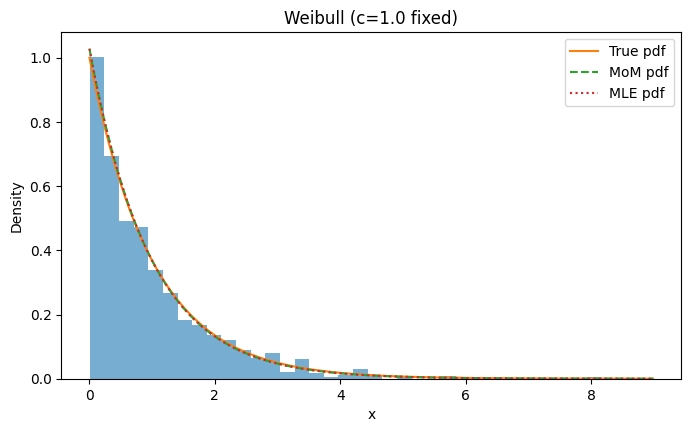

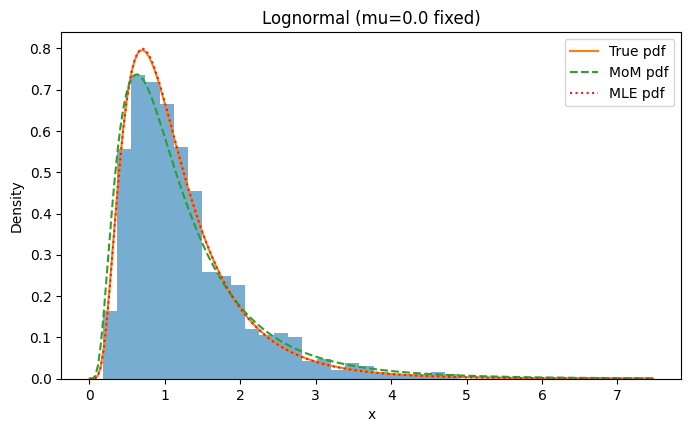

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, lognorm
from scipy.special import gamma
import math

np.random.seed(42)

n = 1000

# --- WEIBULL ---
# Истинные параметры: c=1.0 (shape), loc=0, scale=1.0
c_true_w = 1.0
loc_true_w = 0.0
scale_true_w = 1.0

X_w = weibull_min.rvs(c_true_w, loc=loc_true_w, scale=scale_true_w, size=n)

# Метод моментов: scale = sample_mean / Γ(1+1/c)
sample_mean_w = X_w.mean()
scale_mom_w = sample_mean_w / gamma(1 + 1.0 / c_true_w)

# MLE через scipy, фиксируем c и loc
c_est_mle_w, loc_est_mle_w, scale_est_mle_w = weibull_min.fit(
    X_w, floc=loc_true_w, fc=c_true_w
)

print("Weibull:")
print(f"  sample mean = {sample_mean_w:.6f}")
print(f"  scale (MoM) = {scale_mom_w:.6f}")
print(f"  scale (MLE) = {scale_est_mle_w:.6f}")

# --- LOGNORMAL ---
# Истинные параметры: mu=0.0 (известен), sigma=0.6 (оценим)
mu_true_l = 0.0
sigma_true_l = 0.6

X_l = np.random.lognormal(mean=mu_true_l, sigma=sigma_true_l, size=n)

sample_mean_l = X_l.mean()

# Метод моментов: mean = exp(mu + sigma^2/2)
val = 2.0 * (np.log(sample_mean_l) - mu_true_l)
sigma_mom_l = math.sqrt(val) if val > 0 else float('nan')

# MLE через scipy, фиксируем loc=0 и scale=exp(mu)
s_est_mle_l, loc_est_mle_l, scale_est_mle_l = lognorm.fit(
    X_l, floc=0.0, fscale=math.exp(mu_true_l)
)

print("\nLognormal:")
print(f"  sample mean = {sample_mean_l:.6f}")
print(f"  sigma (MoM) = {sigma_mom_l:.6f}")
print(f"  sigma (MLE) = {s_est_mle_l:.6f}")

# --- Графики ---
# Weibull
x_w = np.linspace(0, X_w.max()*1.1, 200)
pdf_true_w = weibull_min.pdf(x_w, c_true_w, loc=loc_true_w, scale=scale_true_w)
pdf_mom_w = weibull_min.pdf(x_w, c_true_w, loc=loc_true_w, scale=scale_mom_w)
pdf_mle_w = weibull_min.pdf(x_w, c_true_w, loc=loc_true_w, scale=scale_est_mle_w)

plt.figure(figsize=(8,4.5))
plt.hist(X_w, bins=35, density=True, alpha=0.6)
plt.plot(x_w, pdf_true_w, label='True pdf')
plt.plot(x_w, pdf_mom_w, '--', label='MoM pdf')
plt.plot(x_w, pdf_mle_w, ':', label='MLE pdf')
plt.title('Weibull (c=1.0 fixed)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

# Lognormal
x_l = np.linspace(0, X_l.max()*1.1, 200)
pdf_true_l = lognorm.pdf(x_l, s=sigma_true_l, loc=0.0, scale=math.exp(mu_true_l))
pdf_mom_l = lognorm.pdf(x_l, s=sigma_mom_l, loc=0.0, scale=math.exp(mu_true_l))
pdf_mle_l = lognorm.pdf(x_l, s=s_est_mle_l, loc=loc_est_mle_l, scale=scale_est_mle_l)

plt.figure(figsize=(8,4.5))
plt.hist(X_l, bins=35, density=True, alpha=0.6)
plt.plot(x_l, pdf_true_l, label='True pdf')
plt.plot(x_l, pdf_mom_l, '--', label='MoM pdf')
plt.plot(x_l, pdf_mle_l, ':', label='MLE pdf')
plt.title('Lognormal (mu=0.0 fixed)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()
